In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict

In [4]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]
print(X.shape)

(70000, 784)


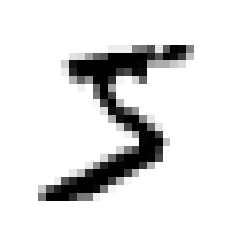

In [5]:
some_digit = X.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
# 60000 > 30000
X_train, X_test, y_train, y_test = X[:30000], X[30000:], y[:30000], y[30000:]

In [8]:
y_train_large = (y_train.astype(float) >= 7)
y_train_odd = (y_train.astype(float) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [9]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9714034018628375

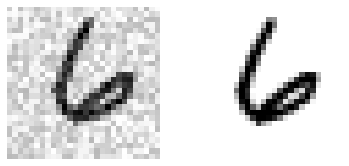

In [10]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")
some_index = 4
plt.subplot(121); plot_digit(X_test_mod.iloc[some_index].values)
plt.subplot(122); plot_digit(y_test_mod.iloc[some_index].values)
plt.show()

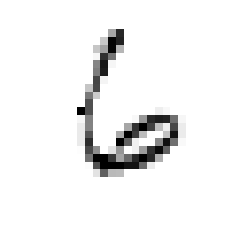

In [11]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod.iloc[some_index]])
plot_digit(clean_digit)
plt.show()

In [7]:
# EXERCISE 2:
X, y = mnist["data"], mnist["target"]
y = y.astype(int) # Convert target labels to integers
# Create the target labels for multi-label classification
y_small = (y < 5)
y_even = (y % 2 == 0)
y_prime = np.zeros_like(y, dtype=bool)

for i, label in enumerate(y):
    if label in [2, 3, 5, 7]:
        y_prime[i] = True
        
y_multilabel = np.c_[y_small, y_even, y_prime] # multi-label array

X_train, X_test, y_train, y_test = X[:30000], X[30000:], y_multilabel[:30000], y_multilabel[30000:]

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="macro"))

C:\Users\happy\anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:528: RuntimeWarning: invalid value encountered in cast
  fill_value = lib.item_from_zerodim(np.array(np.nan).astype(dtype))


Accuracy: 0.964925
F1 Score: 0.9791006442733464


In [ ]:
# EXERCISE 3:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
noise = np.random.randint(0, 100, X.shape)
X_noisy = X + noise

# Create training and test sets
X_train, X_test, y_train, y_test = X_noisy[:6000], X_noisy[6000:7000], X[:6000], X[6000:7000]

# Apply PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Train the classifier
knn_clf = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=3))
knn_clf.fit(X_train_reduced, y_train)

# Clean the images in the test dataset
X_test_cleaned = knn_clf.predict(X_test_reduced)

# Print out the cleaned images
for i in range(10):  # Change the range according to the number of images you want to print
    original_image = X_test[i].reshape(28, 28)
    cleaned_image = X_test_cleaned[i].reshape(28, 28)

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cleaned_image, cmap='gray')
    plt.title("Cleaned Image")

    plt.show()

In [ ]:
'''n_images = 5
plt.figure(figsize=(10, 4))
for i in range(n_images):
    plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.subplot(2, n_images, i + n_images + 1)
    plt.imshow(y_pred[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
plt.tight_layout()
plt.show()'''

In [15]:
# QUESTION 4:
letter_data = fetch_openml('letter', version=1)
X, y = letter_data["data"], letter_data["target"]

y = y.astype(str).str.upper()

small_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
vowels = ['A', 'E', 'I', 'O', 'U']

y_small = np.isin(y, small_letters)
y_vowel = np.isin(y, vowels)
y_multilabel = np.column_stack((y_small, y_vowel))

X_train, X_test, y_train, y_test = train_test_split(X, y_multilabel, test_size=0.4, random_state=42)

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average="macro"))


Accuracy: 0.962125
F1 Score: 0.9555396545257662
